# 1. Importing Data and Libraries

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install ipykernel
# !pip install ucimlrepo

# You might need to install certifi if ucimlrepo fails to install without it
# !pip install certifi

In [106]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from scipy.stats import chi2_contingency

In [36]:
# Fetch dataset
census_income = fetch_ucirepo(id=20) 

In [45]:

df = census_income.data.original
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. Exploratory Data Analysis (EDA)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [47]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [52]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
# What 
census_income['variables']

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [50]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Digging into the education column

In [103]:
education_counts = df['education'].value_counts()
print(education_counts)

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


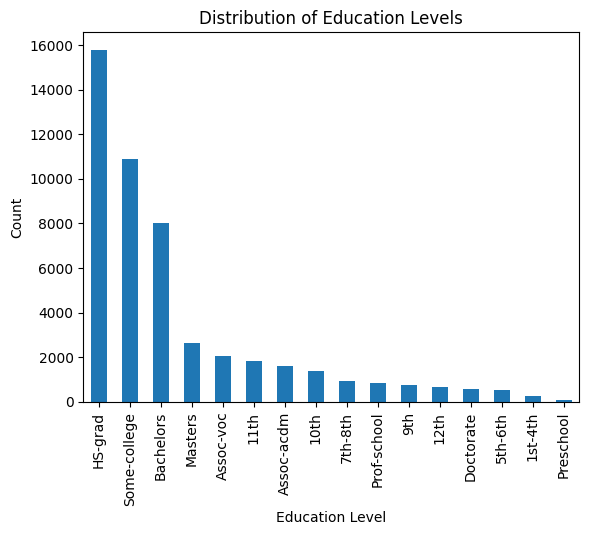

In [63]:
education_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Display the plot
plt.show()

### Digging into the age column

In [55]:
df['age'].median()

37.0

In [135]:
# Define age ranges
bins = [0, 18, 22, 30, 40, 50, float('inf')]
labels = ['<=18', '19-22', '23-30', '31-40', '41-50', '51+']

# Categorize ages into ranges and put them in the dataframe
df['age-ranges'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df['age-ranges'].value_counts())


age-ranges
31-40    12929
41-50    10724
51+      10674
23-30     9796
19-22     4124
<=18       595
Name: count, dtype: int64


### Digging into Hours-per-week

<Axes: xlabel='hours-per-week', ylabel='count'>

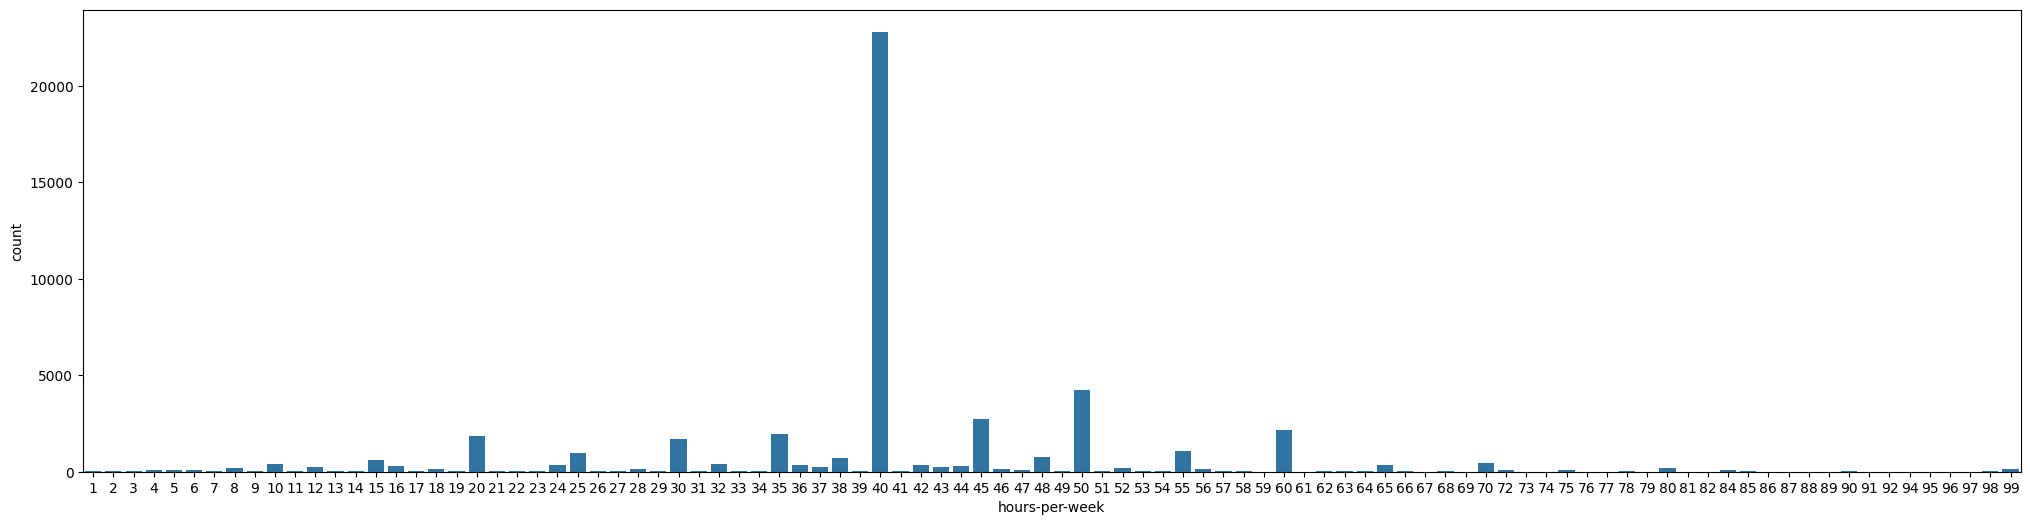

In [134]:
plt.figure(figsize=(25, 6))
sns.countplot(x='hours-per-week', data=df)

# 3. Hypothesis Formulation:

## 1. Hypothesis - There is a correlation between education and age.

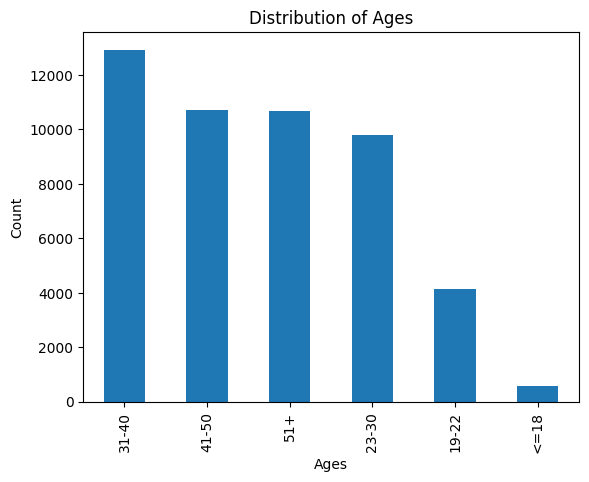

In [127]:
df['age-ranges'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Ages')

# Display the plot
plt.show()

I think there is some correlation. Higher education and older age (31-50+, sorry) are on the left side of the graphs, whereas elementary/middle/high school and younger ages (17-30) are on the right side of the graphs. This is probably because many people who are older than 30 have had the chance to go to university and get a bachelor's or master's degree, whereas it's harder to get a master's degree if you're 18. However, prof-school and doctorate are on the left side of the graph. I think those are outliers though. Most people don't go to prof-school or achieve doctorate level education, regardless of age.

## 2. Hypothesis - age and hours per week are correlated.

<Axes: xlabel='hours-per-week', ylabel='age'>

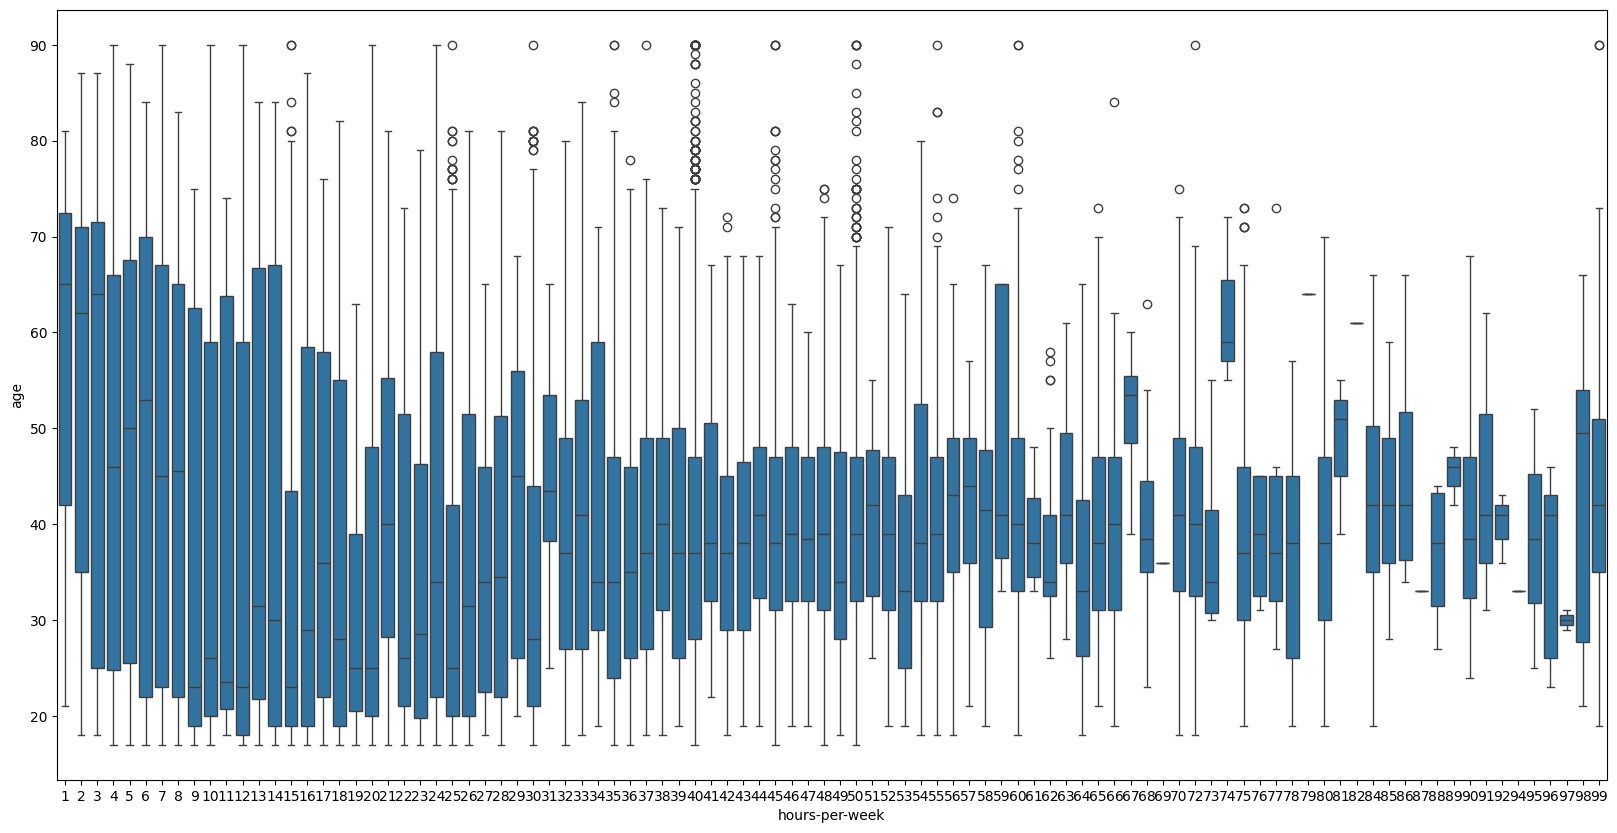

In [142]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='hours-per-week', y='age', data=df)

I would've done age on the x-axis and hours-per-week on the y-axis, but that graph was hard to read. You can see a relationship in this graph. The median age of people who work 1-3 hours per week is above 60. Then, when the hours-per-week increases to around 9-12, the median age drops to 20-25. However, as the hours-per-week increases, the median age also increases until the hours-per-week hits 40. Then, the median age stabilizes at around 40.

This makes sense. Usually the people who work little are people who have retired or are children. Since this is a dataset focused on adults, most of the people who work 1-3 hours will be seniors. Young people aged 20-25 may work part time, explaining the 9-12 hours per week. However, once they're old enough (35-40) where they've developed their career, they will most likely be working 40 hours-per-week or more. However, after 66 hours-per-week, the median age starts to be less stable.

# Extra Credit

## 3. Hypothesis - Marital status and occupation are correlated.

In [111]:
# Makes a table counting each pair of occupation x marital-status
contingency_table = pd.crosstab(df['marital-status'], df['occupation'])
contingency_table.head()

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
marital-status,,,,,,,,,,,,,,,
Divorced,185,1192,0,679,890,90,197,434,762,46,795,121,664,239,254
Married-AF-spouse,2,6,0,4,3,1,1,1,5,0,4,1,5,0,1
Married-civ-spouse,637,1495,7,3818,3600,869,724,1469,1088,27,3182,583,2491,609,1489
Married-spouse-absent,29,84,0,77,52,35,32,37,92,9,64,7,55,9,30
Never-married,771,2360,8,1301,1260,434,1029,872,2442,99,1849,237,1992,506,486


In [114]:
# Perform chi-squared test, learned about it here (https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)

alpha = 0.05
if p < alpha:
    print(f'p={p}')
    print("There is a significant relationship between the columns.")
else:
    print(f'p={p}')
    print("There is no significant relationship between the columns.")

4907.5805493626485
p=0.0
There is a significant relationship between the columns.


I wanted to see if two categorical variables were correlated and learned about the chi-squared test. It returns a p-value and if it's less than 0.05 (the alpha value), then they are dependent on each other. Since the p-value was calculated to be 0.0, marital status and occupation are correlated.